## Figure 4  notebook for annotating single-cell Multiome (RNA+ATAC-seq) datasets (from neurips 2021, S1D1 multiome)

Last updated: 7/10/2023

Author: Yang-Joon Kim (yang-joon.kim@czbiohub.org)

Notse: 
- We use the neurips 2021, s1d1 (RNA+ATAC) objects - both RNA and ADT modalities(assays)
- Note that the adata.X is normalized differently for RNA and ADT (RNA is log-normalized, whereas ADT is centered-log-ratio transformed). Raw counts are saved in the "counts" layer.
- We use a subset of cell-types for UMAP visualizations for simplicity
- We used two different color palettes for RNA and ADT to make those look visually distinctive.
- RNA: Set1 (default) and viridis (continuous), ATAC: Dark2 and magma (continuous)

In [29]:
import os
import sys
import numpy as np
import pandas as pd
import anndata as ad
import scanpy as sc

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rcParams.update(mpl.rcParamsDefault) #Reset rcParams to default

# Editable text and proper LaTeX fonts in illustrator
# matplotlib.rcParams['ps.useafm'] = True
# Editable fonts. 42 is the magic number
mpl.rcParams['pdf.fonttype'] = 42

# Use "Computer Modern" (LaTeX font) for math numbers
# mpl.rcParams['mathtext.fontset'] = 'cm'
# %matplotlib inline
# change font (for texts)
# mpl.rcParams['font.sans-serif'] = "Arial"
# mpl.rcParams['font.family'] = "sans-serif"

sns.set(style='whitegrid', context='paper')

# ignore warnings regarding fonts
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Plotting style function (run this before plotting the final figure)
def set_plotting_style():
    plt.style.use('seaborn-paper')
    plt.rc('axes', labelsize=12)
    plt.rc('axes', titlesize=12)
    plt.rc('xtick', labelsize=10)
    plt.rc('ytick', labelsize=10)
    plt.rc('legend', fontsize=10)
    plt.rc('text.latex', preamble=r'\usepackage{sfmath}')
    plt.rc('xtick.major', pad=2)
    plt.rc('ytick.major', pad=2)
    plt.rc('mathtext', fontset='stixsans', sf='sansserif')
    plt.rc('figure', figsize=[10,9])
    plt.rc('svg', fonttype='none')


In [2]:
# load utilities module
import sys
sys.path.append("/home/yangjoon.kim/bruno/projects/data.science/yangjoon.kim/excellxgene_tutorial_manuscript/celltype_annotation_tutorial/utilities/")
import sankey

In [3]:
# define the figure path
figpath = "/home/yangjoon.kim/bruno/projects/data.science/yangjoon.kim/excellxgene_tutorial_manuscript/celltype_annotation_tutorial/figures/Figure_RNA_ATAC_multiome/"
sc.settings.figdir = figpath
# set_plotting_style()

# Load the data object

In [ ]:
# Load the main anndata object
adata = sc.read_h5ad("/mnt/ibm_lg/yangjoon.kim/excellxgene_tutorial_manuscript/data/neurips2021_multiome/s1d1_rna_atac_joint_v5.h5ad")

# UMAP plots with different labels/annotations

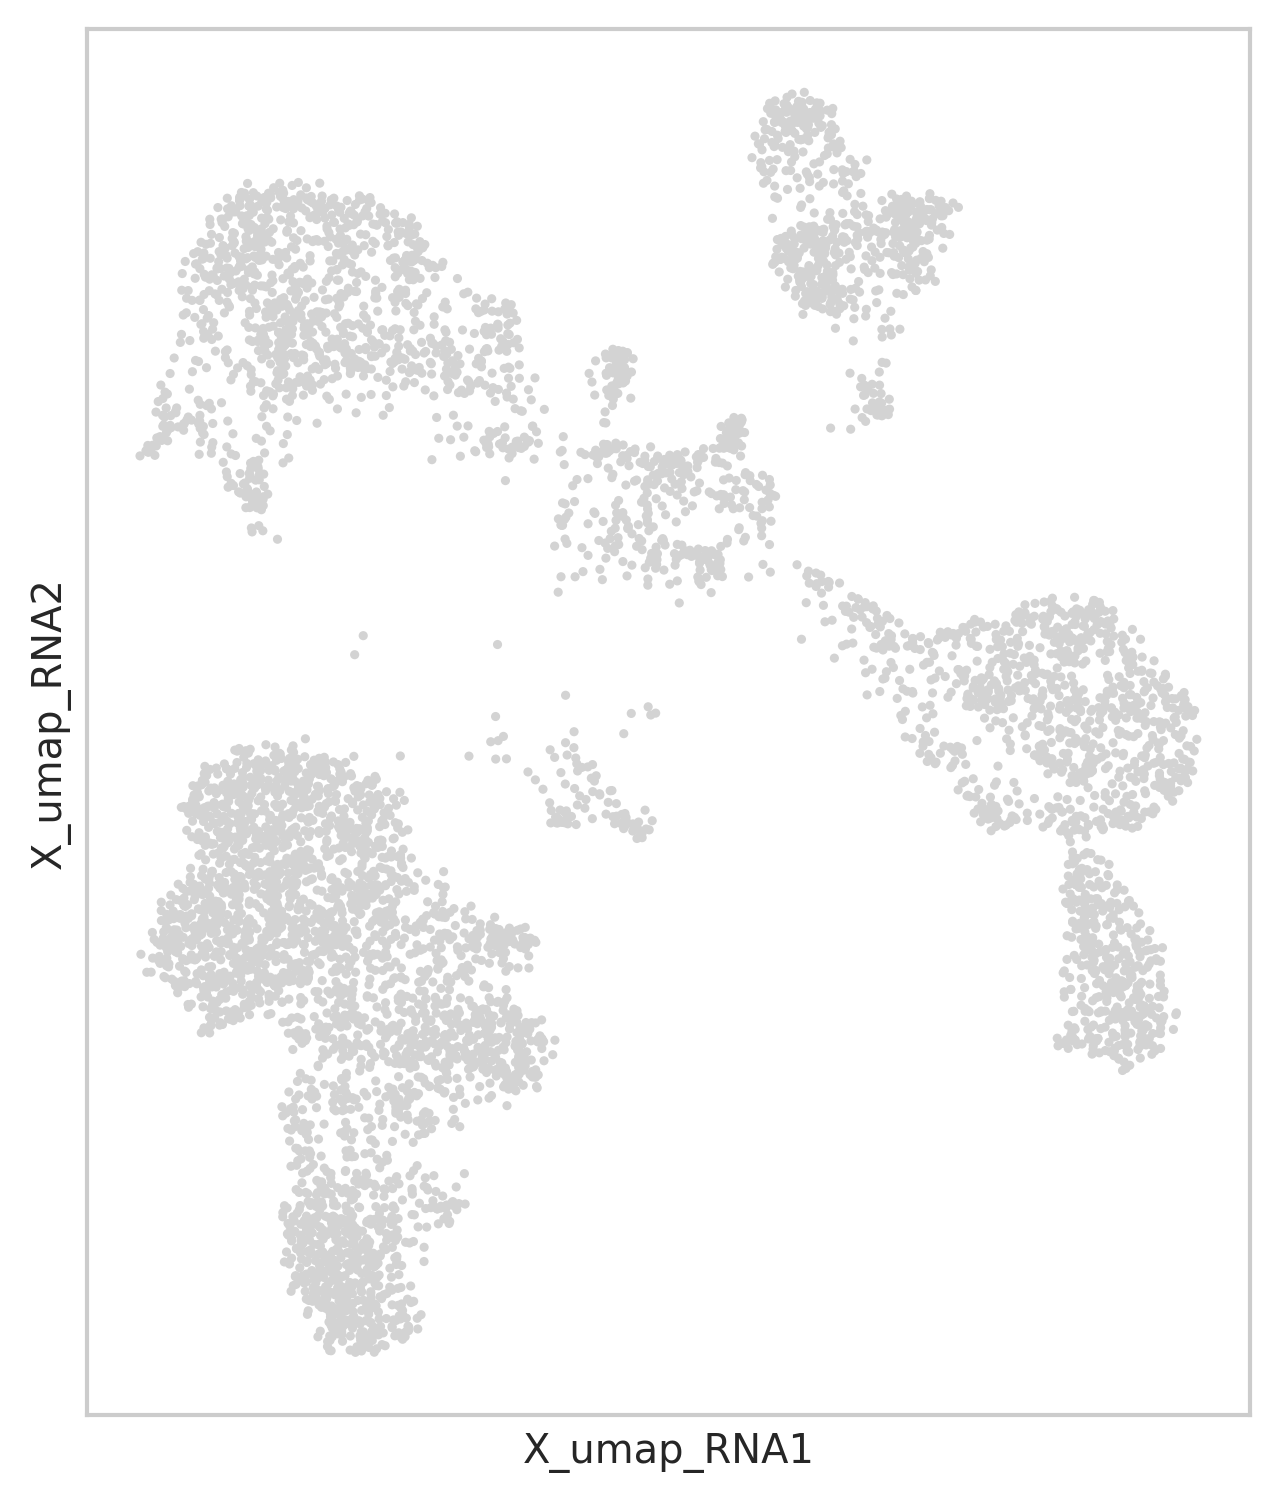

In [7]:
# plot the RNA UMAP without any labels
with plt.rc_context({"figure.figsize": (5, 6), "figure.dpi": (300)}):
    sc.pl.embedding(adata, basis="X_umap_RNA" ,legend_fontsize=8, save="_no_color.pdf")

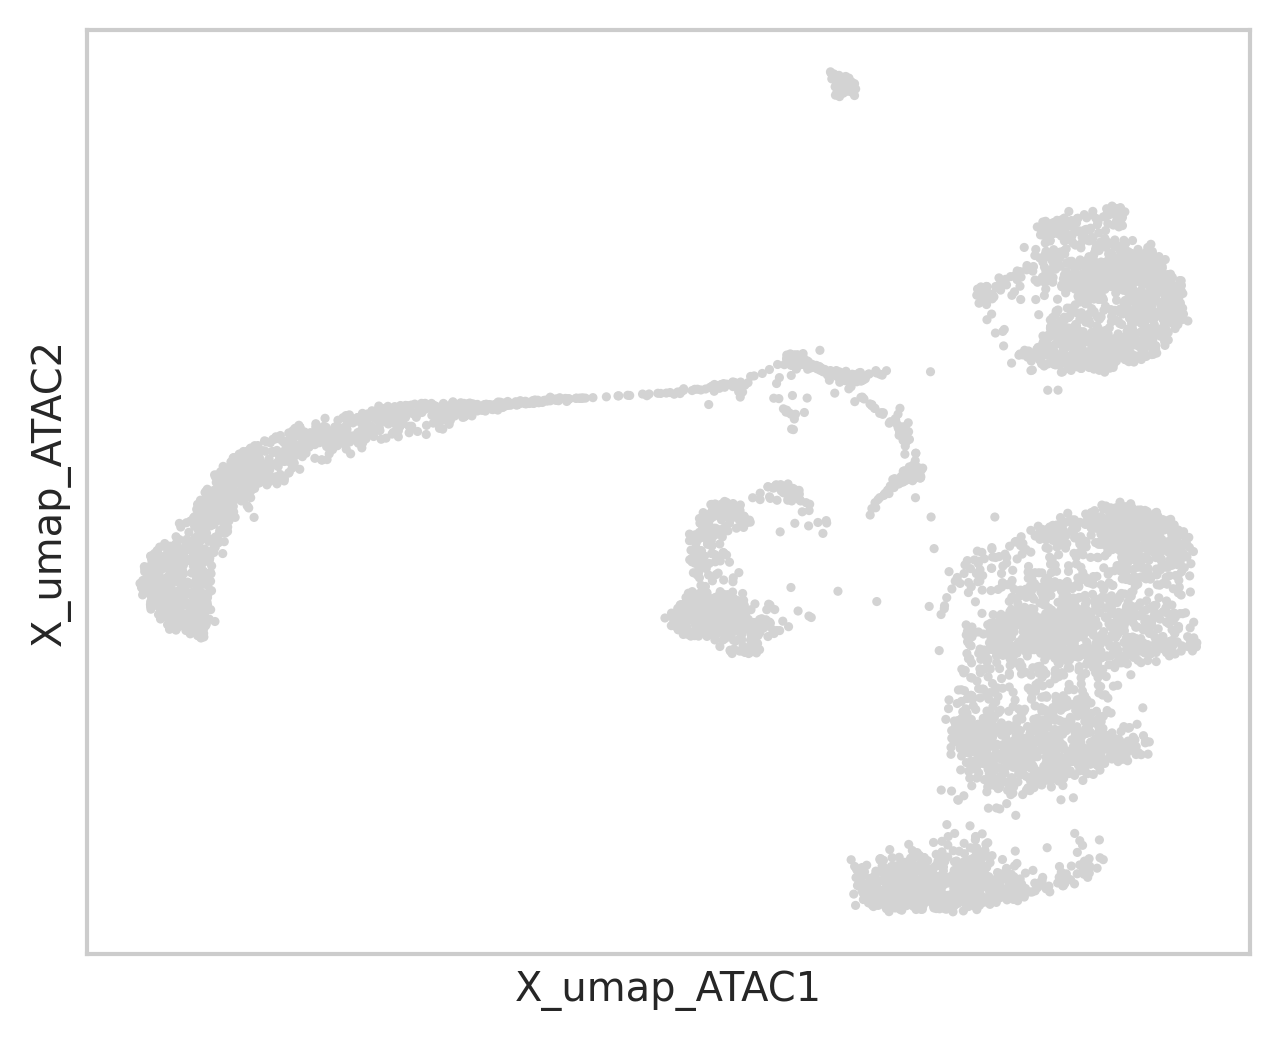

In [8]:
# plot the ATAC UMAP without any labels
with plt.rc_context({"figure.figsize": (5, 4), "figure.dpi": (300)}):
    sc.pl.embedding(adata, basis="X_umap_ATAC" ,legend_fontsize=8,save="_no_color.pdf")

# Leiden clustering on GEX and ATAC

- We performed leiden clustering on exCellxgene for GEX and ATAC, respectively. Then, we exported the clustering results to adata.obs with different resolutions.
- We will use the leiden resolution of 0.15 as that gave us reasonable number of clusters for the initial inspectioin of the data.



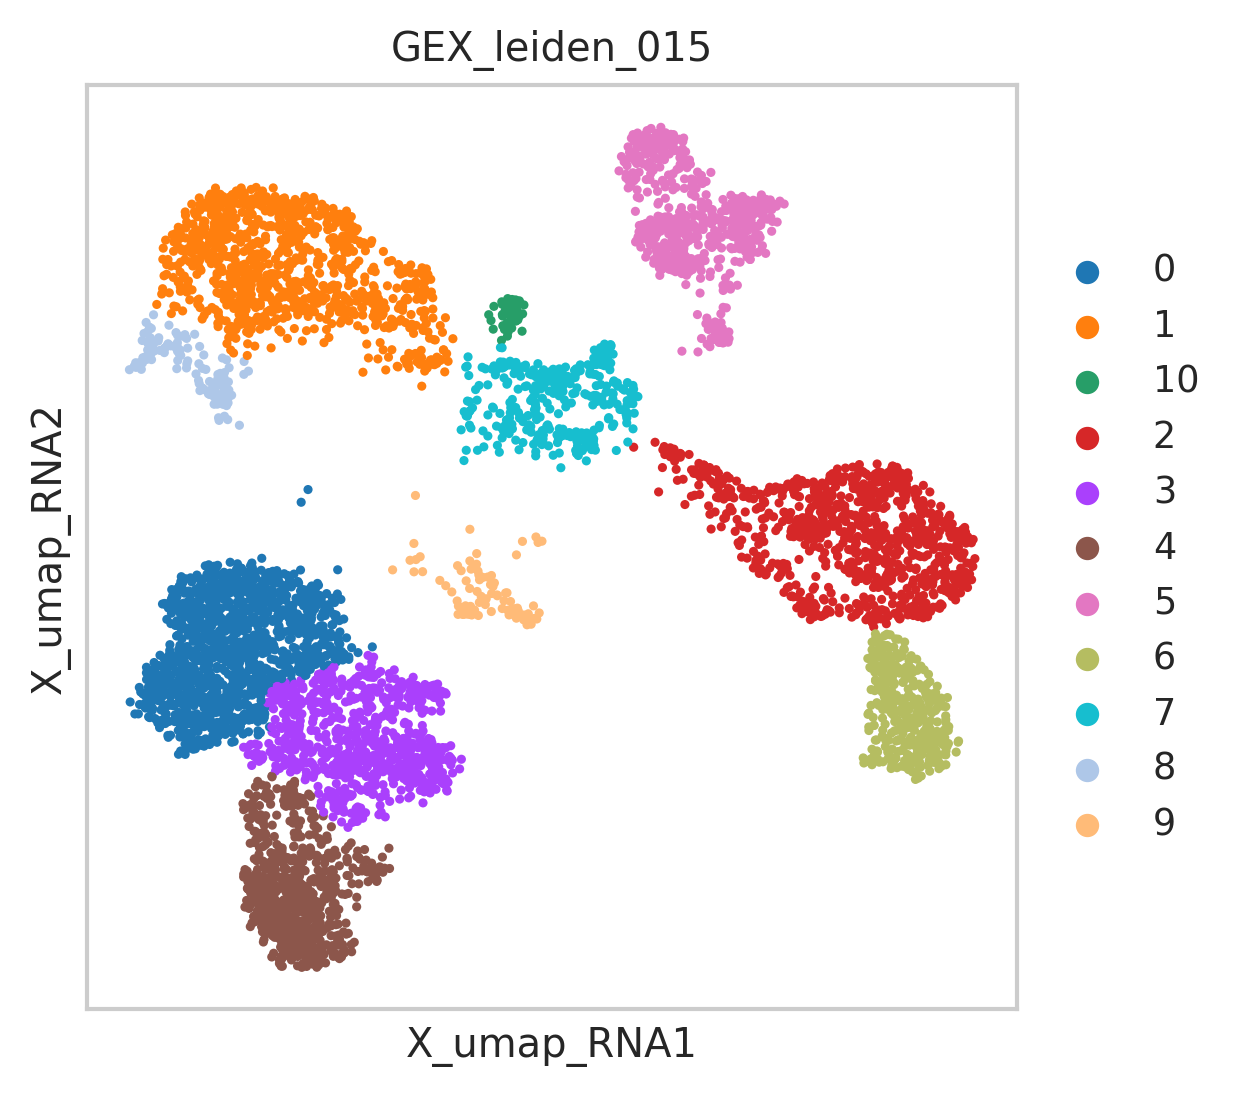

In [19]:
# GEX UMAP with leiden resolution of 0.15
with plt.rc_context({"figure.figsize": (4, 4), "figure.dpi": (300)}):
    sc.pl.embedding(adata, basis="X_umap_RNA", color="GEX_leiden_015",
                    save="_leiden_GEX_015.pdf")

In [118]:
# redefine the colormap in ATAC as Dark2 only has 8 colors.
# We got the 9th color from ChatGPT's suggestion of purple-themed color that matches with the Dark2 style.

# define the Dark2 color palette
# dark2 = plt.get_cmap('Dark2').colors
dark2 = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02', '#a6761d', '#666666']

# add new colors to the palette
new_colors = ['#A95C68', '#587B7F', '#8B6D9C']
dark2_extended = dark2 + new_colors

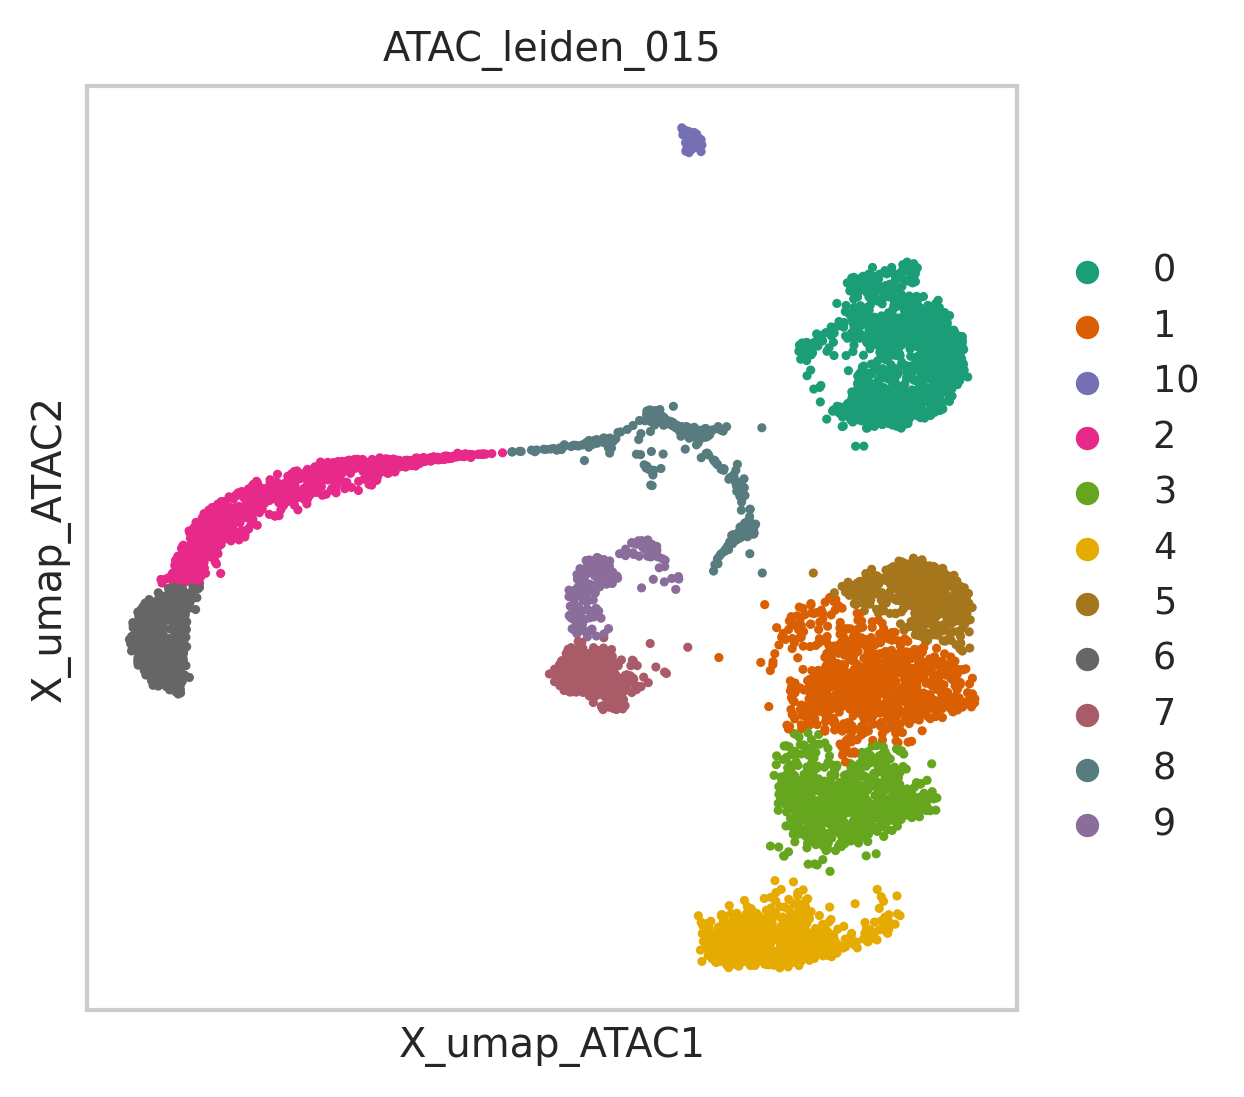

In [23]:
# ATAC UMAP with leiden resolution of 0.15
with plt.rc_context({"figure.figsize": (4, 4), "figure.dpi": (300)}):
    sc.pl.embedding(adata, basis="X_umap_ATAC", color="ATAC_leiden_015", palette=dark2_extended,
                    save="_leiden_ATAC_015.pdf")

In [94]:
# generate a new colormap for the joint embedding visualization
set3_colors = sns.color_palette("Set3", 12)
set3_colors = set3_colors[2:-1]
tab10_colors = sns.color_palette("tab10", 8)
merged_colors = set3_colors+ tab10_colors#np.concatenate((set3_colors, tab10_colors))
merged_colors

[(0.7450980392156863, 0.7294117647058823, 0.8549019607843137),
 (0.984313725490196, 0.5019607843137255, 0.4470588235294118),
 (0.5019607843137255, 0.6941176470588235, 0.8274509803921568),
 (0.9921568627450981, 0.7058823529411765, 0.3843137254901961),
 (0.7019607843137254, 0.8705882352941177, 0.4117647058823529),
 (0.9882352941176471, 0.803921568627451, 0.8980392156862745),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627),
 (0.7372549019607844, 0.5019607843137255, 0.7411764705882353),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862

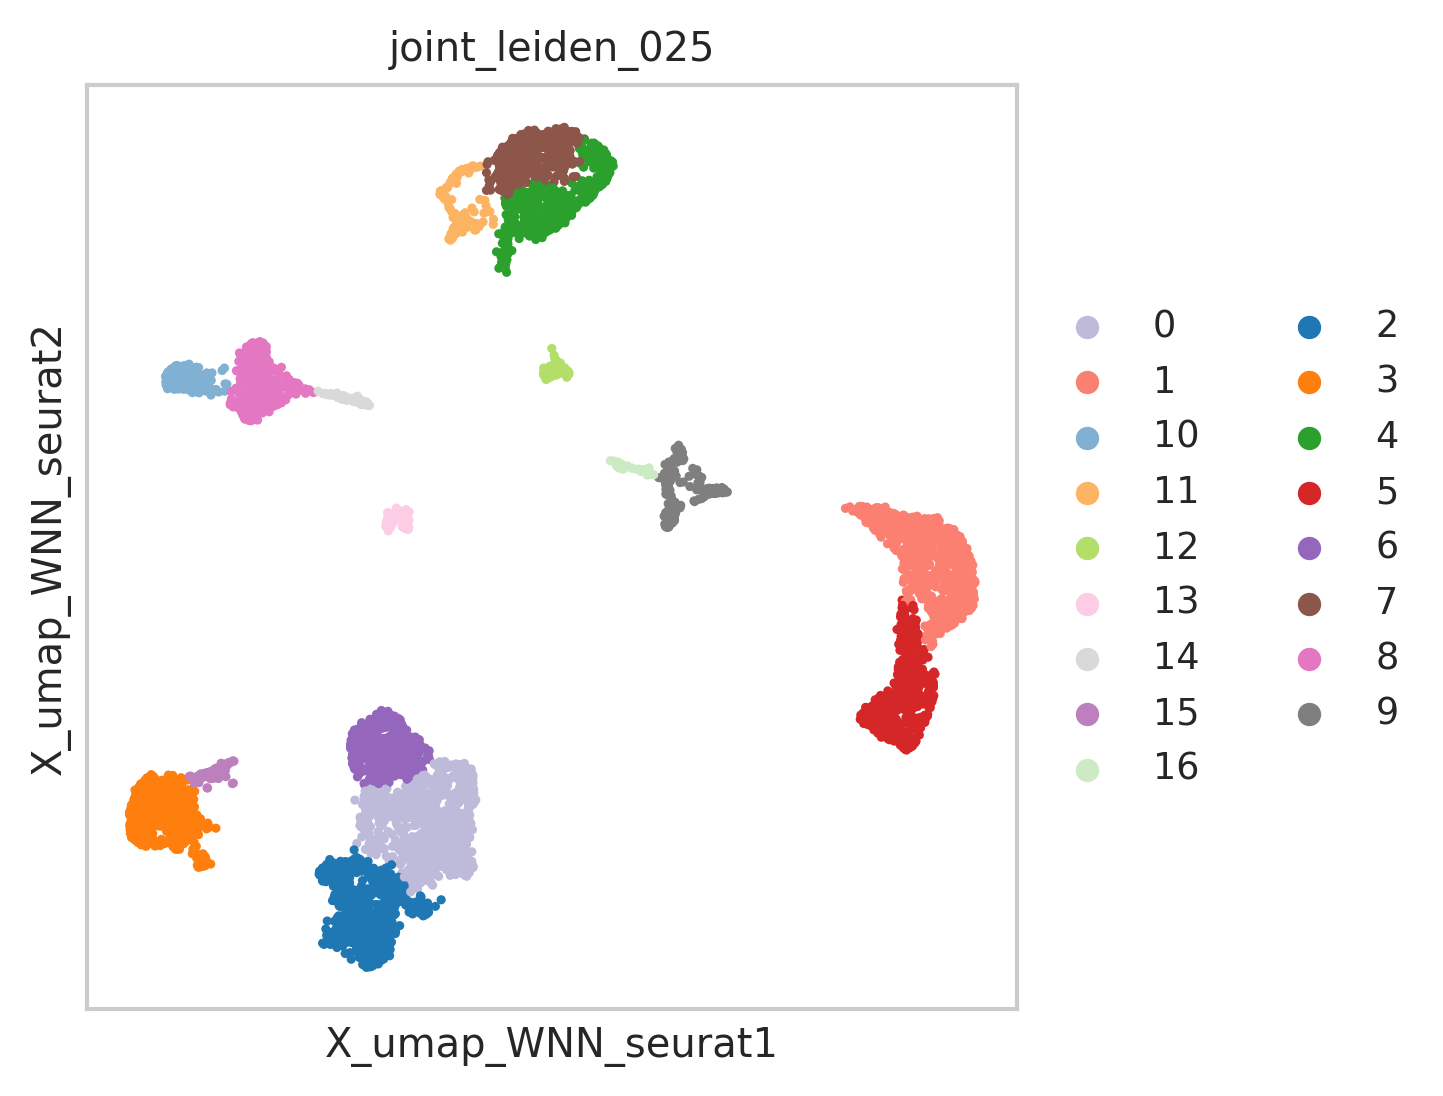

In [95]:
# joint WNN UMAP with leiden resolution of 0.25
# a resolution that resolves the three subpopulations from the above leiden clusters from both RNA and ATAC for the B cells
with plt.rc_context({"figure.figsize": (4, 4), "figure.dpi": (300)}):
    sc.pl.embedding(adata, basis="X_umap_WNN_seurat", color="joint_leiden_025", palette=merged_colors,
                    save="_leiden_joint_015.pdf")


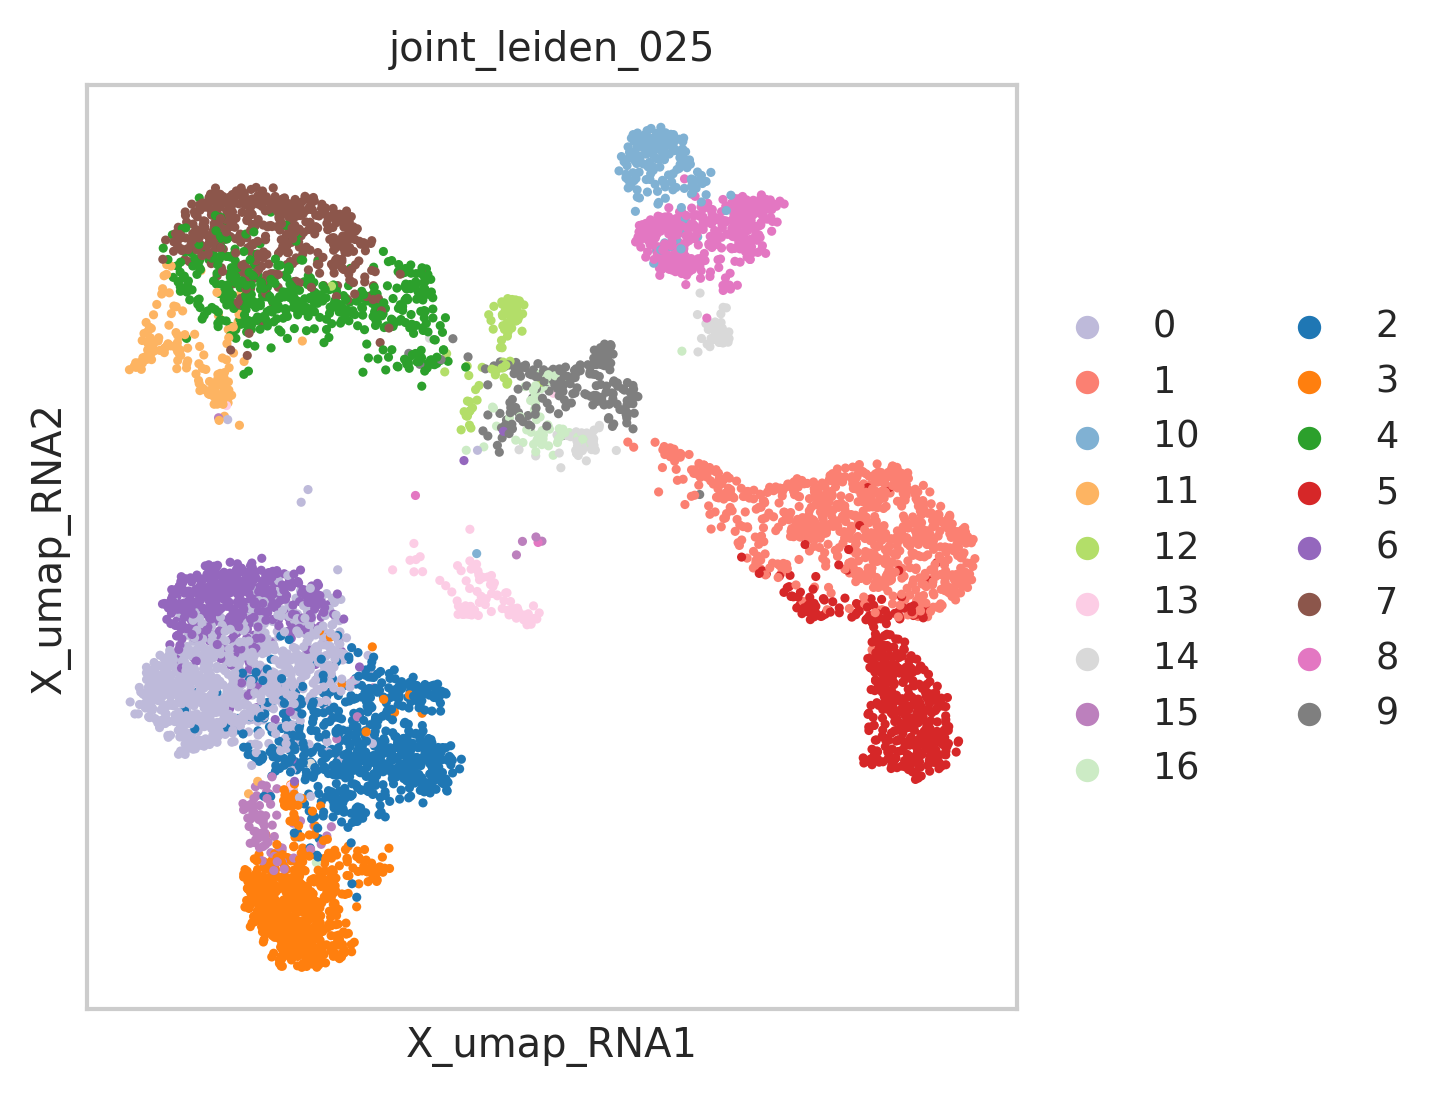

In [97]:
# RNA UMAP with joint leiden 0.25
# ATAC UMAP with leiden resolution of 0.15
with plt.rc_context({"figure.figsize": (4, 4), "figure.dpi": (300)}):
    sc.pl.embedding(adata, basis="X_umap_RNA", color="joint_leiden_025",palette=merged_colors,
                    save="_leiden_joint_0.25.pdf")

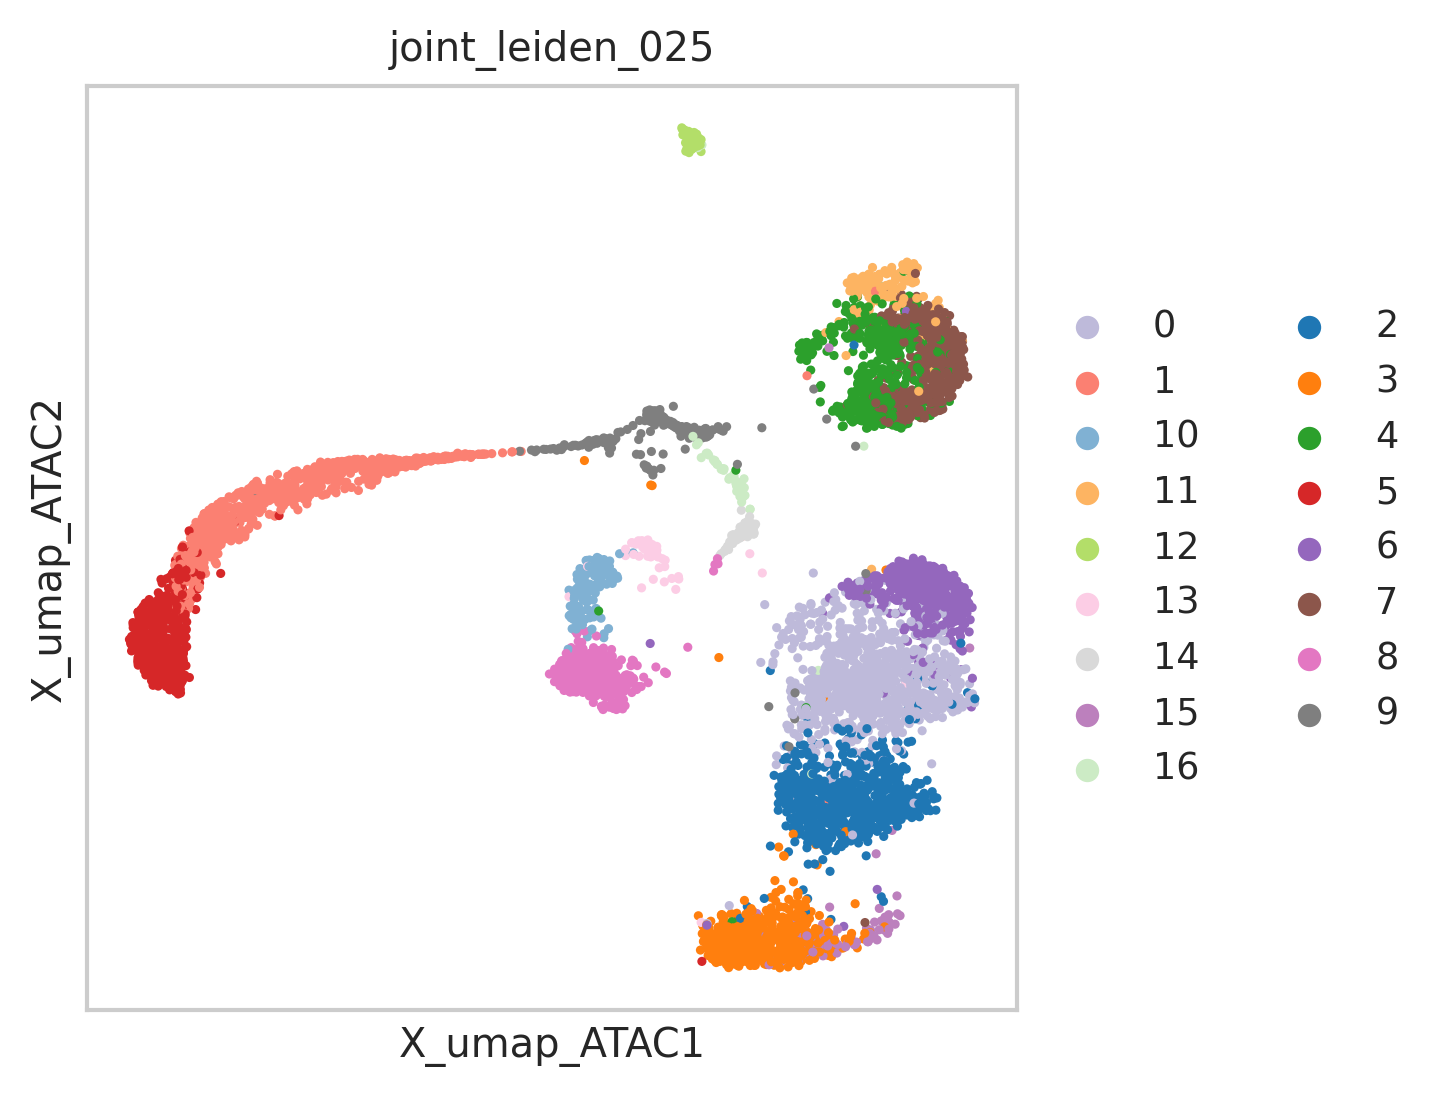

In [101]:
# ATAC UMAP with joint leiden 0.25
# ATAC UMAP with leiden resolution of 0.15
with plt.rc_context({"figure.figsize": (4, 4), "figure.dpi": (300)}):
    sc.pl.embedding(adata, basis="X_umap_ATAC", color="joint_leiden_025", palette=merged_colors,
                    save="_leiden_joint_0.25.pdf")

# Sankey diagram between GEX and ATAC leiden clustering results


In [164]:
adata.obs.GEX_leiden_015 = [label+"-GEX" for label in adata.obs.GEX_leiden_015 ]
adata.obs.head()

,n_genes_by_counts,pct_counts_mt,n_counts,n_genes,size_factors,phase,leiden_final,atac_ann,cell_type,nCount_peaks,...,cell_type_RNA,cell_type_ATAC,GEX_leiden_015,ATAC_leiden_015,manual_annotation_fine,manual_annotation_coarse,joint_leiden_015,joint_leiden_05,joint_leiden_025,manual_annotation_B_fine
AAACAGCCAATTAAGG-1,1088,1.057872,1607.0,1088,0.475175,G2M,CD4+ T naive,CD4+ T naive,CD4+ T naive,4624.0,...,CD4+ T naive,CD4+ T naive,0-GEX,5,CD4+T,unassigned,0,3,6,unassigned
AAACAGCCAGGCTGTT-1,2663,2.492565,7061.0,2663,1.831800,G2M,Lymph prog,Lymph prog,Lymph prog,11965.0,...,Lymph prog,Lymph prog,7-GEX,8,Lymph_prog,unassigned,6,9,16,unassigned
AAACATGCAAAGCGCA-1,1162,0.778643,1798.0,1162,0.587174,G2M,CD4+ T naive,CD4+ T activated,CD4+ T activated,6133.0,...,CD4+ T naive,CD4+ T activated,0-GEX,1,CD4+T,unassigned,0,7,0,unassigned
AAACATGCAATAACCT-1,1224,0.707635,2685.0,1224,0.572425,G2M,Erythroblast,"Proerythroblast, Erythroblast",Erythroblast,13197.0,...,Erythroblast,"Proerythroblast, Erythroblast",2-GEX,2,unassigned,unassigned,2,1,1,unassigned
AAACATGCAATAATGG-1,987,1.251739,1438.0,987,0.413489,S,CD8+ T,"CD4+ T activated, CD8+ T",CD8+ T,5136.0,...,CD8+ T,"CD4+ T activated, CD8+ T",3-GEX,3,CD8+T,unassigned,0,2,2,unassigned


In [165]:
adata.obs.ATAC_leiden_015 = [label+"-ATAC" for label in adata.obs.ATAC_leiden_015 ]
adata.obs.head()

,n_genes_by_counts,pct_counts_mt,n_counts,n_genes,size_factors,phase,leiden_final,atac_ann,cell_type,nCount_peaks,...,cell_type_RNA,cell_type_ATAC,GEX_leiden_015,ATAC_leiden_015,manual_annotation_fine,manual_annotation_coarse,joint_leiden_015,joint_leiden_05,joint_leiden_025,manual_annotation_B_fine
AAACAGCCAATTAAGG-1,1088,1.057872,1607.0,1088,0.475175,G2M,CD4+ T naive,CD4+ T naive,CD4+ T naive,4624.0,...,CD4+ T naive,CD4+ T naive,0-GEX,5-ATAC,CD4+T,unassigned,0,3,6,unassigned
AAACAGCCAGGCTGTT-1,2663,2.492565,7061.0,2663,1.831800,G2M,Lymph prog,Lymph prog,Lymph prog,11965.0,...,Lymph prog,Lymph prog,7-GEX,8-ATAC,Lymph_prog,unassigned,6,9,16,unassigned
AAACATGCAAAGCGCA-1,1162,0.778643,1798.0,1162,0.587174,G2M,CD4+ T naive,CD4+ T activated,CD4+ T activated,6133.0,...,CD4+ T naive,CD4+ T activated,0-GEX,1-ATAC,CD4+T,unassigned,0,7,0,unassigned
AAACATGCAATAACCT-1,1224,0.707635,2685.0,1224,0.572425,G2M,Erythroblast,"Proerythroblast, Erythroblast",Erythroblast,13197.0,...,Erythroblast,"Proerythroblast, Erythroblast",2-GEX,2-ATAC,unassigned,unassigned,2,1,1,unassigned
AAACATGCAATAATGG-1,987,1.251739,1438.0,987,0.413489,S,CD8+ T,"CD4+ T activated, CD8+ T",CD8+ T,5136.0,...,CD8+ T,"CD4+ T activated, CD8+ T",3-GEX,3-ATAC,CD8+T,unassigned,0,2,2,unassigned


In [17]:
left = adata.obs["GEX_leiden_015"]
right = adata.obs["ATAC_leiden_015"]
leftWeight = []
rightWeight = []
# Check weights
if len(leftWeight) == 0:
    leftWeight = np.ones(len(left))

if len(rightWeight) == 0:
    rightWeight = leftWeight


# Create Dataframe
if isinstance(left, pd.Series):
    left = left.reset_index(drop=True)
if isinstance(right, pd.Series):
    right = right.reset_index(drop=True)
dataFrame = pd.DataFrame({'left': left, 'right': right, 'leftWeight': leftWeight,
                          'rightWeight': rightWeight}, index=range(len(left)))
dataFrame

,left,right,leftWeight,rightWeight
0,0-GEX,5-ATAC,1.0,1.0
1,7-GEX,8-ATAC,1.0,1.0
2,0-GEX,1-ATAC,1.0,1.0
3,2-GEX,2-ATAC,1.0,1.0
4,3-GEX,3-ATAC,1.0,1.0
...,...,...,...,...
6219,1-GEX,0-ATAC,1.0,1.0
6220,0-GEX,1-ATAC,1.0,1.0
6221,0-GEX,1-ATAC,1.0,1.0
6222,0-GEX,5-ATAC,1.0,1.0


In [23]:
# define the color scheme for GEX, ATAC, and joint embedding clusters
colors = {
    # GEX color palette (Set1)
    "0-GEX": "#1f77b4",
    "1-GEX": "#ff7f0e",
    "2-GEX": "#279e68",
    "3-GEX": "#d62728",
    "4-GEX": "#aa40fc",
    "5-GEX": '#8c564b',
    "6-GEX": '#e377c2',
    "7-GEX": '#b5bd61',
    "8-GEX": '#17becf',
    "9-GEX": '#aec7e8',
    "10-GEX": '#ffbb78',
    # ATAC (Set2)
    "0-ATAC": "#1b9e77",
    "1-ATAC": "#d95f02",
    "2-ATAC": "#7570b3",
    "3-ATAC": "#e7298a",
    "4-ATAC": "#66a61e",
    "5-ATAC": '#e6ab02',
    "6-ATAC": '#a6761d',
    "7-ATAC": '#666666',
    "8-ATAC": '#a95c68',
    "9-ATAC": '#587b7f',
    "10-ATAC": '#8b6d9c',
    
     "0":'#bebada',
     "1":'#fb8072',
     "2":'#80b1d3',
     "3":'#fdb462',
     "4":'#b3de69',
     "5":'#fccde5',
     "6":'#d9d9d9',
     "7":'#bc80bd',
     "8":'#ccebc5',
     "9":'#1f77b4',
     "10": '#ff7f0e',
     "11":'#2ca02c',
     "12":'#d62728',
     "13":'#9467bd',
     "14":'#8c564b',
     "15":'#e377c2',
     "16":'#7f7f7f'
    
}
colorDict = colors

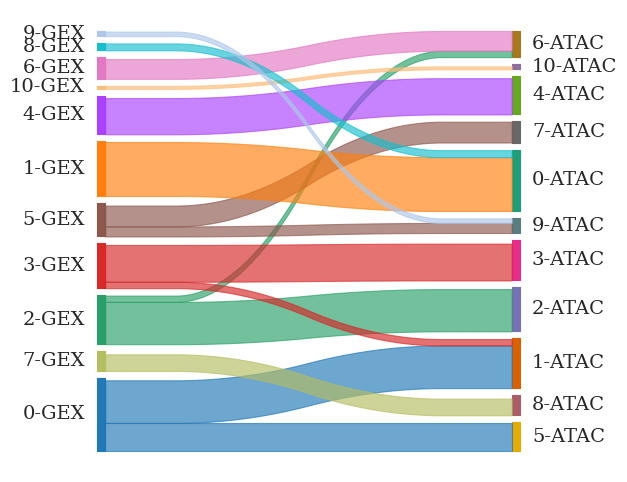

In [38]:
# Use the sankey module from the utilities to generate a sankey diagram (GEX vs joint)

threshold =50

left = adata.obs["GEX_leiden_015"]
right = adata.obs["ATAC_leiden_015"]
leftWeight = []
rightWeight = []

sankey.sankey(left, right, leftWeight, rightWeight, colorDict = colorDict, threshold=threshold)
#plt.savefig("GEX_ATAC_leiden_sankey_filtered_50.pdf", dpi=300)
plt.show()

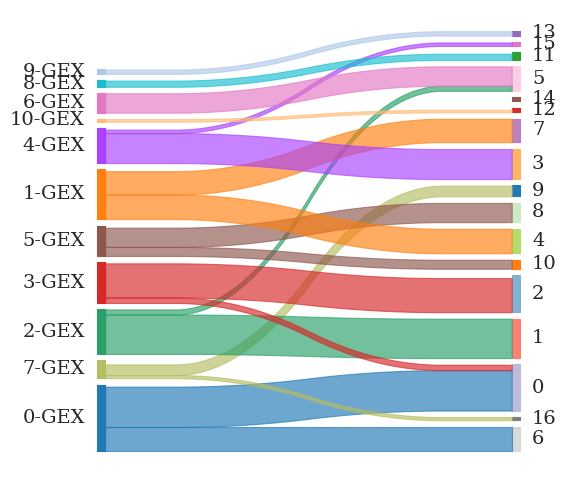

In [36]:
# Use the sankey module from the utilities to generate a sankey diagram (GEX vs joint)

threshold =50

left = adata.obs["GEX_leiden_015"]
right = adata.obs["joint_leiden_025"]
leftWeight = []
rightWeight = []

sankey.sankey(left, right, leftWeight, rightWeight, colorDict = colorDict, threshold=threshold)
#plt.savefig("GEX_joint_leiden_sankey_filtered_50.pdf", dpi=300)
plt.show()

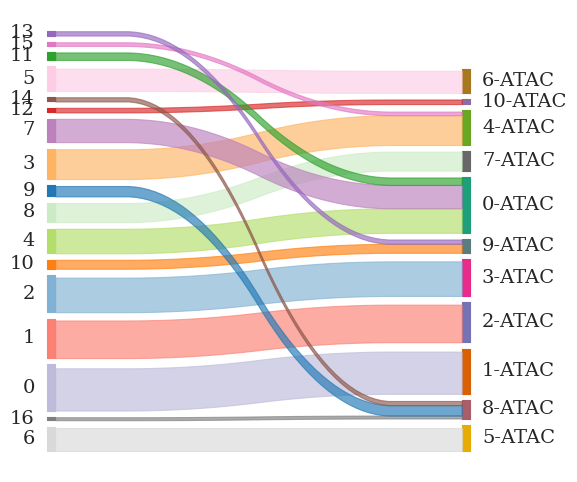

In [35]:
# Use the sankey module from the utilities to generate a sankey diagram (joint vs ATAC)

threshold =50

left = adata.obs["joint_leiden_025"]
right = adata.obs["ATAC_leiden_015"]
leftWeight = []
rightWeight = []

sankey.sankey(left, right, leftWeight, rightWeight, colorDict = colorDict, threshold=threshold)
plt.savefig("joint_ATAC_leiden_sankey_filtered_50.pdf", dpi=300)
plt.show()

# Annotation/Exploration using exCellxgene - B cells

- last updated: 3/7/2023

Here, the annotation was originally done for all fine-grained cell-types by the neurips annotation team.

For visualization, we will merge some fine-grained annotations to make a "coarse" annotation named "manual_annotation". (Basically, merging some sub-populations identified using the surface protein markers).

In [245]:
adata

AnnData object with n_obs × n_vars = 6224 × 36852
    obs: 'n_genes_by_counts', 'pct_counts_mt', 'n_counts', 'n_genes', 'size_factors', 'phase', 'leiden_final', 'atac_ann', 'cell_type', 'nCount_peaks', 'atac_fragments', 'reads_in_peaks_frac', 'blacklist_fraction', 'nucleosome_signal', 'rna_ann', 'cell_type_RNA', 'cell_type_ATAC', 'GEX_leiden_015', 'ATAC_leiden_015', 'manual_annotation_fine', 'manual_annotation_coarse', 'joint_leiden_015', 'joint_leiden_05', 'joint_leiden_025', 'manual_annotation_B_fine'
    var: 'assay'
    uns: 'ATAC_leiden_015_colors', 'GEX_leiden_015_colors', 'cell_type_colors', 'joint_leiden_015_colors', 'joint_leiden_05_colors', 'leiden', 'neighbors', 'pca', 'umap', 'joint_leiden_025_colors'
    obsm: 'X_pca', 'X_pca_RNA', 'X_umap', 'X_umap_ATAC', 'X_umap_RNA', 'X_umap_WNN_muon', 'X_umap_WNN_seurat'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [244]:
adata.obs.manual_annotation_B_fine.unique()

['unassigned', 'B1 B', 'Naive CD20+ B', 'Transitional B']
Categories (4, object): ['B1 B', 'Naive CD20+ B', 'Transitional B', 'unassigned']

In [91]:
# edit the gene names as we've added "-RNA" or "-ATAC" to merge the two modalities
#RNA
marker_genes_rna = {
    'CD14+ Mono': ['FCN1', 'CD14'],
    'CD16+ Mono': ['TCF7L2', 'FCGR3A', 'LYN'],
    'ID2-hi myeloid prog': ['CD14', 'ID2', 'VCAN', 'S100A9', 'CLEC12A', 'KLF4', 'PLAUR'],
    'cDC1': ['CLEC9A', 'CADM1'],
    'cDC2': ['CLEC10A', 'FCER1A', 'CST3', 'COTL1', 'LYZ', 'DMXL2'], # Note: DMXL2 should be negative
    'Reticulocyte': ['SLC4A1', 'SLC25A37', 'HBB', 'HBA2', 'HBA1', 'TFRC'],
    'Erythroblast': ['MKI67', 'HBA1', 'HBB'],
    'Proerythroblast': ['CDK6', 'SYNGR1', 'HBM', 'GYPA'], # Note HBM and GYPA are negative markers
    'ILC': ['ID2', 'PLCG2', 'GNLY', 'SYNE1'],
    'Lymph prog': ['IGLL1', 'VPREB1', 'MME', 'EBF1', 'SSBP2', 'BACH2', 'CD79B', 'IGHM', 'PAX5', 'PRKCE', 'DNTT'],
    'Naive CD20+ B': ['MS4A1', 'IL4R', 'IGHD', 'FCRL1', 'IGHM'],
    'B1 B': ['MS4A1', 'SSPN', 'ITGB1', 'EPHA4', 'COL4A4', 'PRDM1', 'ZNF215', 'IRF4', 'CD38', 'XBP1', 'PAX5', 'BCL11A', 'BLK', 'IGHD', 'IGHM'], # Note IGHD and IGHM are negative markers
    'Transitional B': ['MME', 'CD38', 'CD24', 'ACSM3', 'MSI2'],
    'Plasma cells': ['MZB1', 'HSP90B1', 'FNDC3B', 'PRDM1', 'IGKC', 'JCHAIN'],
    'Plasmablast': ['XBP1', 'RF4', 'PRDM1', 'PAX5'],  # Note PAX5 is a negative marker
    'CD4+ T activated': ['CD4', 'IL7R', 'TRBC2', 'ITGB1'],
    'CD4+ T naive': ['CD4', 'IL7R', 'TRBC2', 'CCR7'],
    'CD8+ T': ['CD8A', 'CD8B', 'GZMB', 'GZMA', 'CCL5', 'GZMK', 'GZMH', 'GZMA'],
    'NK': ['GNLY', 'NKG7', 'CD247', 'GRIK4', 'FCER1G', 'TYROBP', 'KLRG1', 'FCGR3A'],
    'T activation': ['CD69', 'CD38'], # CD69 much better marker!
    'T naive': ['LEF1', 'CCR7', 'TCF7'],
    'pDCs': ['GZMB', 'IL3RA', 'COBLL1', 'TCF4'],
    'G/M prog': ['MPO', 'BCL2', 'KCNQ5', 'CSF3R', 'PRTN3'],
    'HSC': ['NRIP1', 'MECOM', 'PROM1', 'CD34', 'NKAIN2'],
    'MK/E prog': ['ZNF385D', 'ITGA2B', 'RYR3', 'PLCB1'] # Note PLCB1 is a negative marker
}

for cell_type in marker_genes_rna:
    genes = marker_genes_rna[cell_type]
    new_genes = [gene + "-RNA" for gene in genes]
    marker_genes_rna[cell_type] = new_genes
    
marker_genes_rna

#ATAC
marker_genes_atac = {
    'CD14+ Mono': ['TREM1', 'FPR1'],
    'CD16+ Mono': ['LYN', 'TCF7L2'],
    'ID2-hi myeloid prog': ['KLF4'],
    'cDC2': ['TREM1', 'DMXL2'], # Note: DMXL2 should be negative
    'Reticulocyte': ['GATA1', 'HBA1', 'SLC4A1', 'SLC25A37', 'KLF1'],
    'Erythroblast': ['GATA1', 'MKI67'],
    'Proerythroblast': ['GATA2', 'CRACD', 'SYNGR1'],
    'ILC': ['SPON2', 'GZMB', 'PRF1', 'C69'], # Note CD69 should be negative
    'Lymph prog': ['MME', 'IGLL1', 'VPREB1', 'CD79B'],
    'Naive CD20+ B': ['MS4A1', 'LYN', 'CD74', 'BLK'],
    'B1 B': ['ITGB1', 'MS4A1', 'DUSP22', 'EPHA4'],
    'Transitional B': ['MME', 'CD38', 'CD24'],
    'Plasma cells': ['DUSP22', 'FNDC3B'],
    'CD4+ T activated': ['JAKMIP1', 'C4orf50'],
    'CD4+ T naive': [ 'BCL11B', 'BACH2', 'JAKMIP1', 'C4orf50'], # Note JAKMIP1 and C4orf50 are negative markers
    'CD8+ T': ['CD8A', 'CD8B'],
    'NK': ['CD160', 'GNLY', 'GRIK4', 'CD247'],
    'pDCs': ['PTPRS', 'TCF4', 'KCNN3', 'DUSP22'],
    'G/M prog': ['MPO','NT5DC3'],
    'HSC': ['PRDM16','TAMALIN','MTRNR2L1'],
    'MK/E prog': ['DNAJC6']
}

for cell_type in marker_genes_atac:
    genes = marker_genes_atac[cell_type]
    new_genes = [gene + "-ATAC" for gene in genes]
    marker_genes_atac[cell_type] = new_genes
    
marker_genes_atac

{'CD14+ Mono': ['TREM1-ATAC', 'FPR1-ATAC'],
 'CD16+ Mono': ['LYN-ATAC', 'TCF7L2-ATAC'],
 'ID2-hi myeloid prog': ['KLF4-ATAC'],
 'cDC2': ['TREM1-ATAC', 'DMXL2-ATAC'],
 'Reticulocyte': ['GATA1-ATAC',
  'HBA1-ATAC',
  'SLC4A1-ATAC',
  'SLC25A37-ATAC',
  'KLF1-ATAC'],
 'Erythroblast': ['GATA1-ATAC', 'MKI67-ATAC'],
 'Proerythroblast': ['GATA2-ATAC', 'CRACD-ATAC', 'SYNGR1-ATAC'],
 'NK': ['CD160-ATAC', 'GNLY-ATAC', 'GRIK4-ATAC', 'CD247-ATAC'],
 'ILC': ['SPON2-ATAC', 'GZMB-ATAC', 'PRF1-ATAC', 'C69-ATAC'],
 'Lymph prog': ['MME-ATAC', 'IGLL1-ATAC', 'VPREB1-ATAC', 'CD79B-ATAC'],
 'Naive CD20+ B': ['MS4A1-ATAC', 'LYN-ATAC', 'CD74-ATAC', 'BLK-ATAC'],
 'B1 B': ['ITGB1-ATAC', 'MS4A1-ATAC', 'DUSP22-ATAC', 'EPHA4-ATAC'],
 'Transitional B': ['MME-ATAC', 'CD38-ATAC', 'CD24-ATAC'],
 'Plasma cells': ['DUSP22-ATAC', 'FNDC3B-ATAC'],
 'CD4+ T activated': ['JAKMIP1-ATAC', 'C4orf50-ATAC'],
 'CD4+ T naive': ['BCL11B-ATAC', 'BACH2-ATAC', 'JAKMIP1-ATAC', 'C4orf50-ATAC'],
 'CD8+ T': ['CD8A-ATAC', 'CD8B-ATAC'],
 'pD

### marker genes for B cells (RNA)
- pan B cell markers: ["CD79B-RNA", "PAX5-RNA", "EBF1-RNA"]

### marker genes for B cell subtypes (RNA)
- 'Naive CD20+ B': ['MS4A1', 'IL4R', 'IGHD', 'FCRL1', 'IGHM'],
- 'B1 B': ['MS4A1', 'SSPN', 'ITGB1', 'EPHA4', 'COL4A4', 'PRDM1', 'ZNF215', 'IRF4', 'CD38', 'XBP1', 'PAX5', 'BCL11A', 'BLK', 'IGHD', 'IGHM'], # Note IGHD and IGHM are negative markers
- 'Transitional B': ['MME', 'CD38', 'CD24', 'ACSM3', 'MSI2'],

### marker genes for B cell subtypes (ATAC)
- 'Naive CD20+ B': ['MS4A1', 'LYN', 'CD74', 'BLK'],
- 'B1 B': ['ITGB1', 'MS4A1', 'DUSP22', 'EPHA4'],
- 'Transitional B': ['MME', 'CD38', 'CD24'],

## markers that I chose for visualization and further exploration
- Naive CD20+ B: ["IL4R-RNA", "IGHD-RNA"]
- B1 B: ["ITGB1-RNA", "SSPN-RNA"]
- Transitional B: ["MME-RNA", "CD24-RNA"]
    


In [281]:
adata

AnnData object with n_obs × n_vars = 6224 × 36852
    obs: 'n_genes_by_counts', 'pct_counts_mt', 'n_counts', 'n_genes', 'size_factors', 'phase', 'leiden_final', 'atac_ann', 'cell_type', 'nCount_peaks', 'atac_fragments', 'reads_in_peaks_frac', 'blacklist_fraction', 'nucleosome_signal', 'rna_ann', 'cell_type_RNA', 'cell_type_ATAC', 'GEX_leiden_015', 'ATAC_leiden_015', 'manual_annotation_fine', 'manual_annotation_coarse', 'joint_leiden_015', 'joint_leiden_05', 'joint_leiden_025', 'manual_annotation_B_fine'
    var: 'assay'
    uns: 'ATAC_leiden_015_colors', 'GEX_leiden_015_colors', 'cell_type_colors', 'joint_leiden_015_colors', 'joint_leiden_05_colors', 'leiden', 'neighbors', 'pca', 'umap', 'joint_leiden_025_colors', 'manual_annotation_B_fine_colors'
    obsm: 'X_pca', 'X_pca_RNA', 'X_umap', 'X_umap_ATAC', 'X_umap_RNA', 'X_umap_WNN_muon', 'X_umap_WNN_seurat'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [273]:
adata.uns["joint_leiden_025_colors"]

['#bebada',
 '#fb8072',
 '#80b1d3',
 '#fdb462',
 '#b3de69',
 '#fccde5',
 '#d9d9d9',
 '#bc80bd',
 '#ccebc5',
 '#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f']

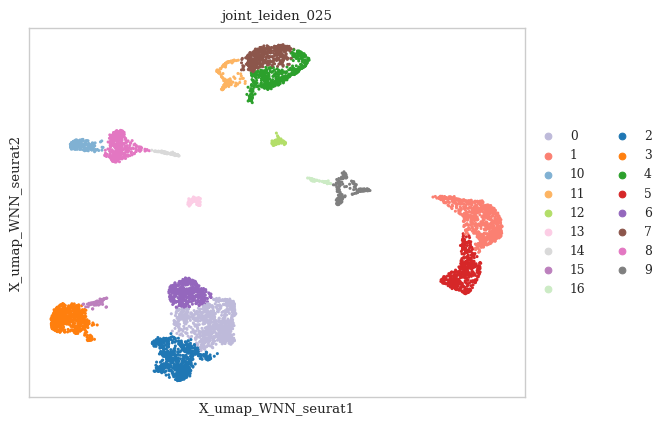

In [272]:
sc.pl.embedding(adata, basis="X_umap_WNN_seurat", color="joint_leiden_025")

In [278]:
adata.uns["manual_annotation_B_fine_colors"] = ['#80b1d3', '#e377c2','#d9d9d9', '#838B8B']
sc.pl.embedding(adata, basis="X_umap_WNN_seurat", color="manual_annotation_B_fine", 
                save="_B_subtypes.pdf")

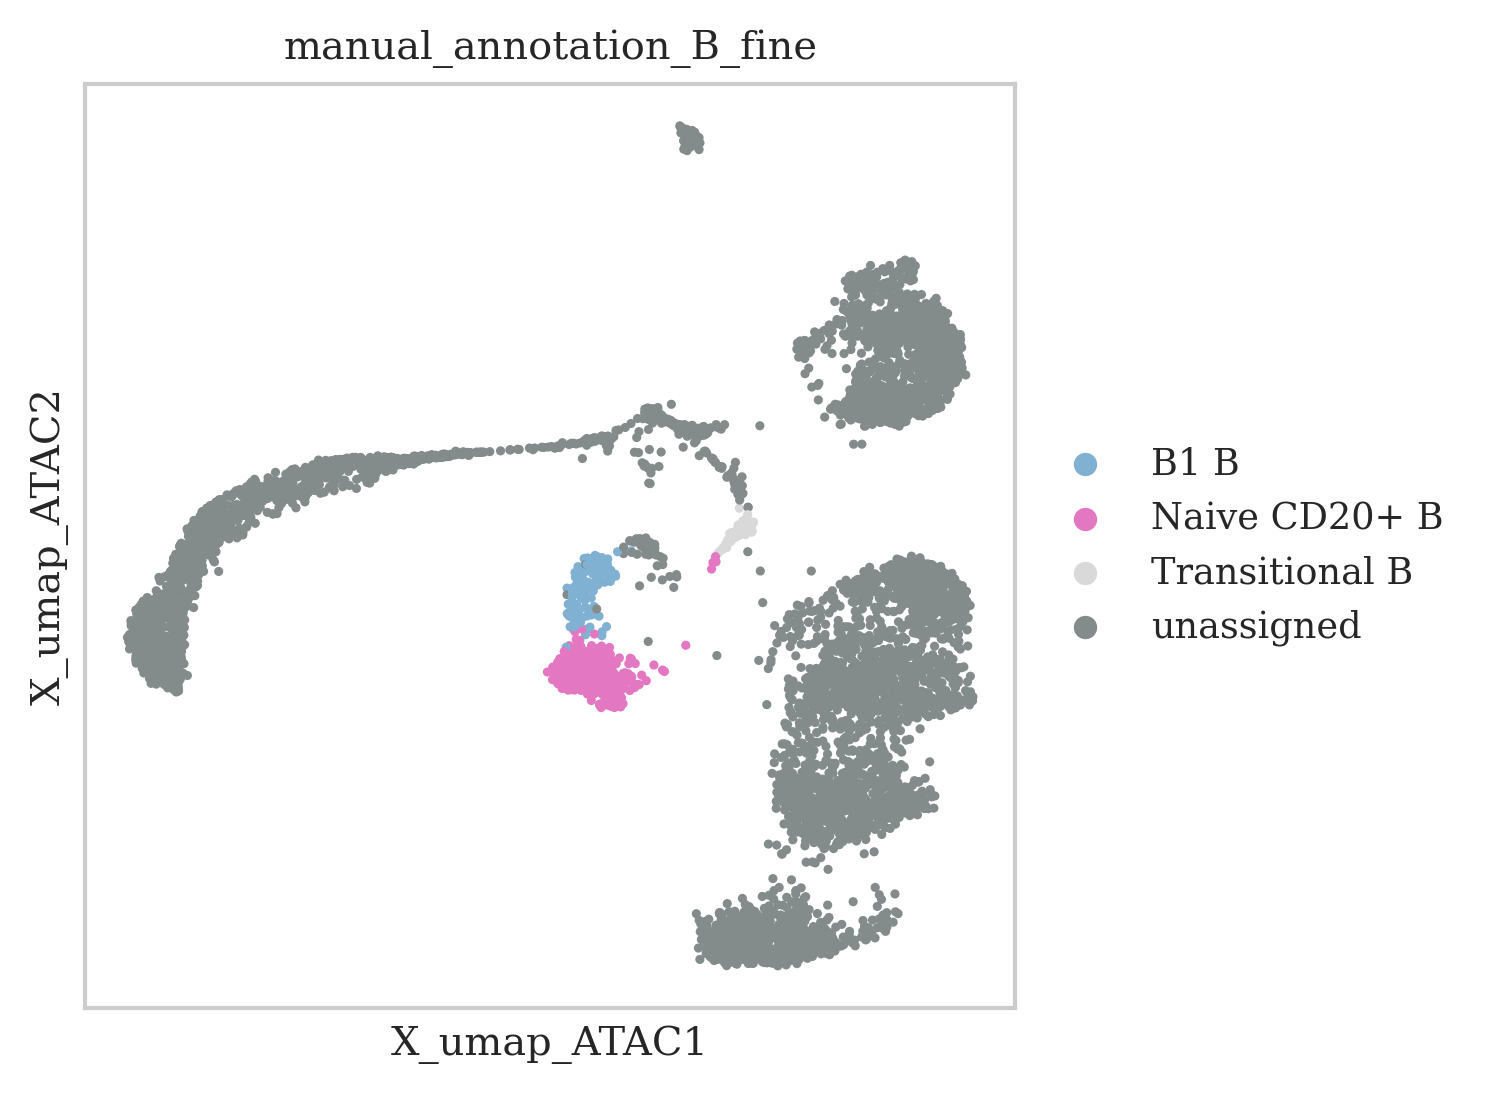

In [286]:
# ATAC UMAP with manual B cell subtype annotation
with plt.rc_context({"figure.figsize": (4, 4), "figure.dpi": (300)}):
    sc.pl.embedding(adata, basis="X_umap_ATAC", color="manual_annotation_B_fine")#, 
                    #save="_B_subtypes.pdf")

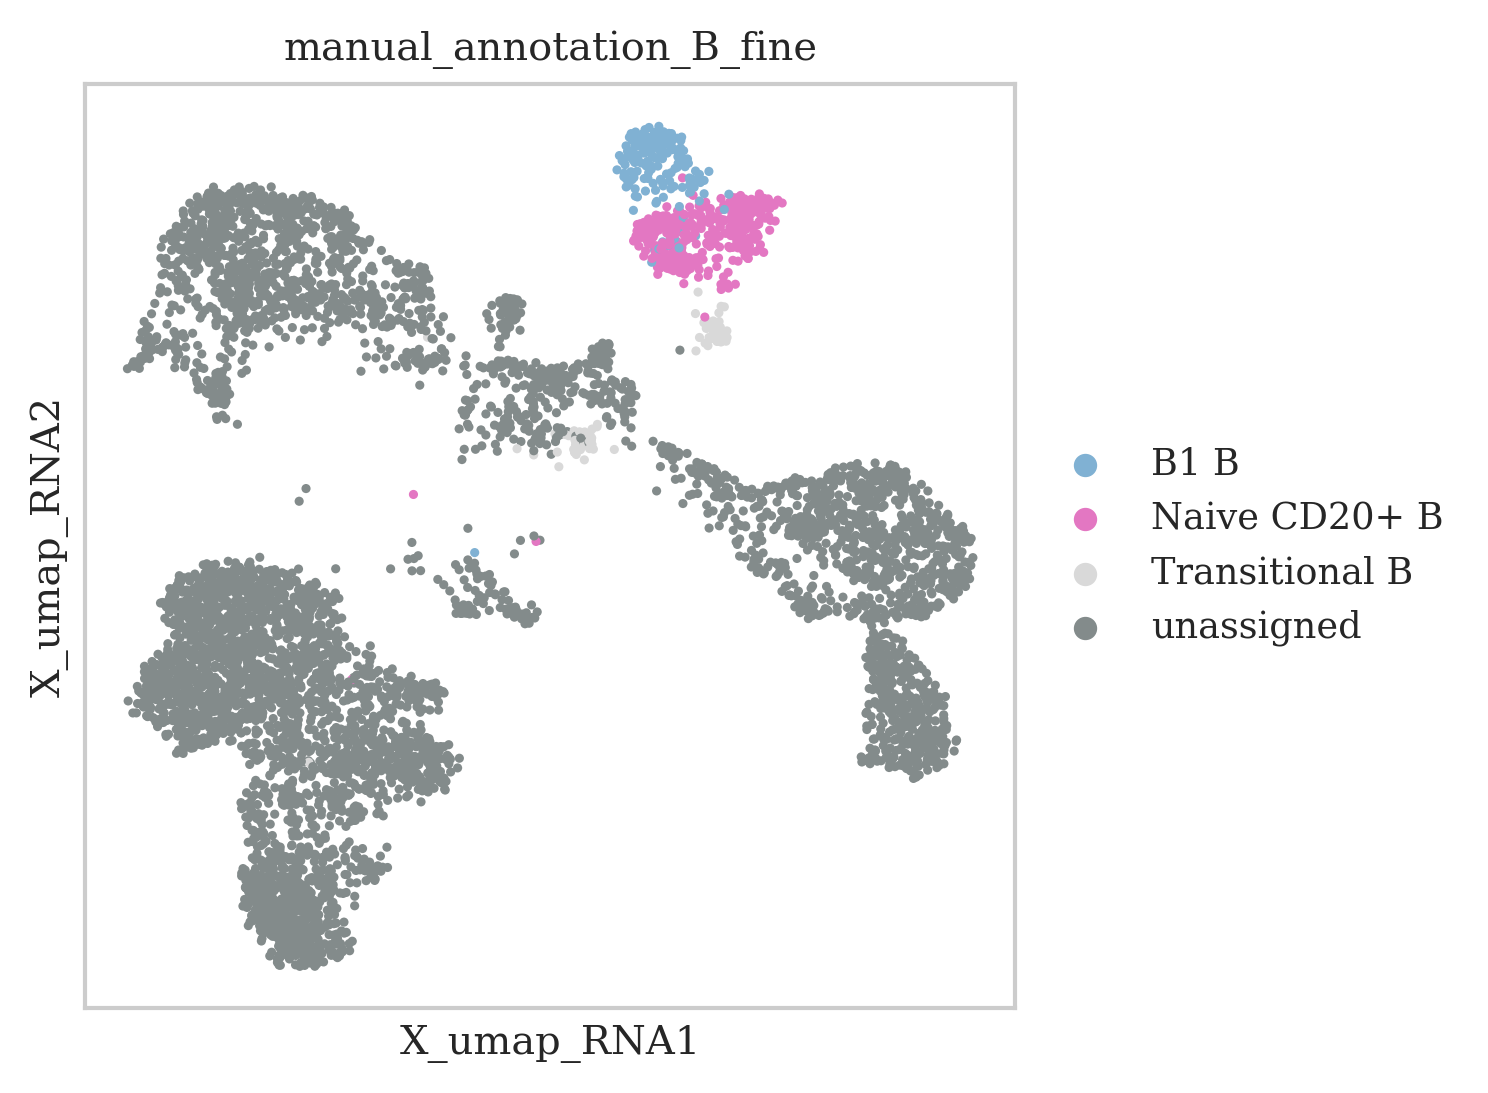

In [285]:
# RNA(GEX) UMAP with manual B cell subtype annotation
with plt.rc_context({"figure.figsize": (4, 4), "figure.dpi": (300)}):
    sc.pl.embedding(adata, basis="X_umap_RNA", color="manual_annotation_B_fine")#, 
                    #save="_B_subtypes.pdf")

In [287]:
adata.write_h5ad("/mnt/ibm_lg/yangjoon.kim/excellxgene_tutorial_manuscript/data/neurips2021_multiome/s1d1_rna_atac_joint_v5.h5ad")